# SimpleDemo

The purpose of this notebook is to give a quick demonstration of how to use the MiniScatter Python interface, including running single simulations, getting the data, caching, and scans.

## Code setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import ROOT
import os

Welcome to JupyROOT 6.20/04


In [2]:
#Setup MiniScatter -- modify the path to where you built MiniScatter!
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots

In [3]:
#Enable zooming etc. on MATPLOTLIB plots inside JuPyter (not in JupyterLab!)

# %matplotlib notebook

#If necessary, set different figsizes (otherwise too small on hi-res screens)
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100


## Simulation setup

In [4]:
### Basic simulation parameters ###

QUIET   = False #Reduced output?
TRYLOAD = True  #Try to load already existing data instead of recomputing?
NUM_THREADS = 8 #Number of parallel threads to use for scans
#Where to store temporary data for scans (a fast file system, NOT EOS/AFS)
TMPFOLDER = "/tmp/miniScatter/SimpleDemo_thicknessScan"

#When making multiple scans, it's nice to first create a `baseSimSetup` and then modify it for each simulation
# Note: each argument here corresponds roughly to a command line argument.
# Look inside miniScatterDriver.runScatter() to see how.

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS" #Use the __SS physics lists for thin foils
baseSimSetup["PHYS"]  = "QGSP_BERT"
baseSimSetup["N"]     = 1000 #Just a few events here! Remember that thicker targets are slower

baseSimSetup["ENERGY"] = 215.0 #[MeV]

#Use a distribution defined by Twiss parameters instead of a pencil beam?
#EPS   = 3.0 #[um]
#BETA  = 1.4 #[m]
#ALPHA = 0.0
#baseSimSetup["COVAR"] = (EPS,BETA,ALPHA)

#Use a flat distribution or cut the tails of the Gaussian?
#baseSimSetup["BEAM_RCUT"] = 3.0

#Where to start the beam.
#baseSimSetup["ZOFFSET_BACKTRACK"] = True
baseSimSetup["ZOFFSET"]           = 0.0 #Auto

#Beam particle type
baseSimSetup["BEAM"]    = "e-"

baseSimSetup["WORLDSIZE"] = 1000.0 #Make the world wider

#Target is 10 mm of aluminium
baseSimSetup["THICK"] = 10
baseSimSetup["MAT"] = "G4_Al"

#Detector distance from target center [mm] 
baseSimSetup["DIST"] = 3000.0 

#Some output settings
baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = False #Skip TTRees in the .root files

baseSimSetup["EDEP_DZ"]   = 1.0
baseSimSetup["CUTOFF_RADIUS"] = 100.0 #Larger radial cutoff

#Store the .root files in a subfolder from where this script is running,
# normally MiniScatter/examples, in order to keep things together
baseSimSetup["OUTFOLDER"] = os.path.join(os.getcwd(),"SimpleDemo")


## Just a simple simulation

Here we run a short simulation and load the data. No caching

In [5]:
#Run the simulation

simSetup_simple1 = baseSimSetup.copy()
#Give the .root file a name
simSetup_simple1["OUTNAME"] = "simple1"

miniScatterDriver.runScatter(simSetup_simple1, quiet=QUIET)

Running command line: './MiniScatter -t 10 -m G4_Al -d 3000.0 -w 1000.0 -p QGSP_BERT -n 1000 -e 215.0 -b e- -z 0.0 -f simple1 -o /home/kyrsjo/code/MiniScatter/examples/SimpleDemo --cutoffRadius 100.0 --edepDZ 1.0'
RunFolder = '/home/kyrsjo/code/MiniScatter/build'
logName   = '/home/kyrsjo/code/MiniScatter/build/MiniScatterLog_2020-07-09T11:42:11.629053.txt'
-
Event# 0
Event# 500
-
Done!


In [6]:
#Load the data
print("Loading data...")
(twiss_simple1, numPart_simple1, objects_simple1) = \
    miniScatterDriver.getData(filename=os.path.join(simSetup_simple1["OUTFOLDER"],simSetup_simple1["OUTNAME"])+".root",\
                              quiet=QUIET, getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata"])
print("Done!")
print()

#Look at the catch
print ("TWISS:")
print (twiss_simple1.keys())
print (" |- ", twiss_simple1['init'].keys())
print (" |    |- ", twiss_simple1['init']['x'].keys())
print (" |    |- ", twiss_simple1['init']['x'].keys())
print()
print("twiss_simple1['target_exit']['x']['alpha'] =", twiss_simple1['target_exit']['x']['alpha'])
print()
print()

print("NUMPART:")
print(numPart_simple1.keys())
print("numPart_simple1['target'] =", numPart_simple1['target'])
print()
print()

print("OBJECTS:")
print(objects_simple1.keys())
print("objects_simple1['targetEdep'] =", objects_simple1['targetEdep'])

Loading data...
Done!

TWISS:
dict_keys(['init', 'target_exit', 'target_exit_cutoff', 'tracker', 'tracker_cutoff', 'tracker_cutoffPDG-11', 'tracker_cutoffPDGother', 'tracker_cutoffPDG11', 'tracker_cutoffPDG22', 'tracker_cutoffPDG2212'])
 |-  dict_keys(['x', 'y'])
 |    |-  dict_keys(['eps', 'beta', 'alpha', 'posAve', 'angAve', 'posVar', 'angVar', 'coVar'])
 |    |-  dict_keys(['eps', 'beta', 'alpha', 'posAve', 'angAve', 'posVar', 'angVar', 'coVar'])

twiss_simple1['target_exit']['x']['alpha'] = -0.1405129145655844


NUMPART:
dict_keys(['target', 'target_cutoff', 'tracker', 'tracker_cutoff'])
numPart_simple1['target'] = {-11: 9, 11: 1106, 22: 1237, 2212: 1}


OBJECTS:
dict_keys(['targetEdep', 'target_edep_dens', 'target_edep_rdens', 'metadata'])
objects_simple1['targetEdep'] = Name: targetEdep-localClone Title: targetEdep NbinsX: 1000


Note: Here, only 3 of the many possible objects were loaded from the .root file.
To see all of them, enter the folder `MiniScatter/examples/SimpleDemo` and run `rootls simple1.root`.

Typical output:

In [7]:
! rootls -t SimpleDemo/simple1.root

TH1D              Jul 09 11:42 2020 init_E                                "Initial particle energy"
TH2D              Jul 09 11:42 2020 init_x                                "Initial phase space (x)"
TVectorT<double>  Jul 09 11:42 2020 init_x_TWISS                          ""
TH2D              Jul 09 11:42 2020 init_xy                               "Initial phase space (x,y)"
TH2D              Jul 09 11:42 2020 init_y                                "Initial phase space (y)"
TVectorT<double>  Jul 09 11:42 2020 init_y_TWISS                          ""
TTree             Jul 09 11:42 2020 magnetEdeps                           "Magnet Edeps tree"
  Cluster INCLUSIVE ranges:
   - # 0: [0, 998]
   - # 1: [999, 999]
  The total number of clusters is 2
TVectorT<double>  Jul 09 11:42 2020 metadata                              ""
TVectorT<double>  Jul 09 11:42 2020 target_cutoff_ParticleTypes_numpart   ""
TVectorT<double>  Jul 09 11:42 2020 target_cutoff_ParticleTypes_PDG       ""
TH3D           

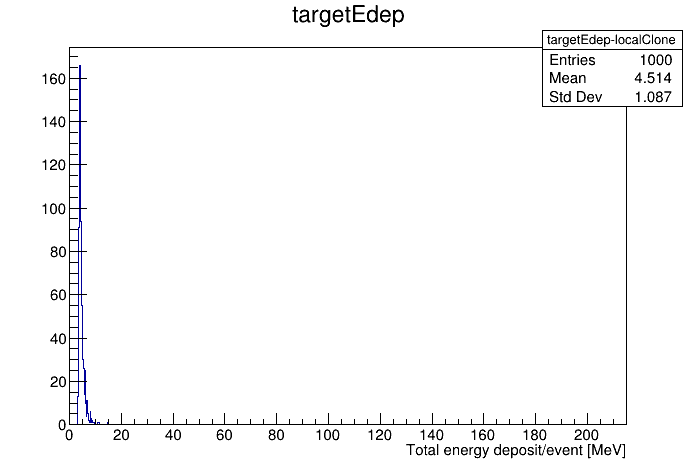

In [8]:
canvas = ROOT.TCanvas()
objects_simple1['targetEdep'].Draw()
canvas.Draw()

In [9]:
# Run & load in one step, with results caching
(twiss_simple1, numPart_simple1, objects_simple1) = \
    miniScatterDriver.getData_tryLoad(simSetup_simple1, tryload=TRYLOAD,\
    getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata"])

Found a file at '/home/kyrsjo/code/MiniScatter/examples/SimpleDemo/simple1.root', loading!


## A parameter scan

As an example, let's look at the number of positrons coming out of a Tungsten target as a function of thickness, and their energy distributions.

In [10]:
baseSimSetup_W = baseSimSetup.copy()
baseSimSetup_W["MAT"] = "G4_W"
baseSimSetup_W["N"]   = baseSimSetup_W["N"]*10 #Make more events for nicer plots, but this takes time...
del baseSimSetup_W["THICK"] #Can't have the key we're scanning in the baseSimSetup
del baseSimSetup_W["OUTFOLDER"] #Can't have OUTFOLDER in baseSimSetup

thickScan_W = np.linspace(0.5,100,10)
print ("thickScan_W =",thickScan_W, "[mm]")
print()

#Note: TRYLOAD is forced off, in order to force computation
(twiss_W, numPart_W, objects_W, analysis_output_W) = \
    miniScatterScanner.ScanMiniScatter("THICK",thickScan_W,baseSimSetup_W, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=False,\
                                       COMMENT="SimpleDemo-TargetThickness-W", QUIET=QUIET,\
                                       tmpFolder=TMPFOLDER, getObjects=['target_exit_energy_PDG-11', 'targetEdep'])


thickScan_W = [  0.5         11.55555556  22.61111111  33.66666667  44.72222222
  55.77777778  66.83333333  77.88888889  88.94444444 100.        ] [mm]

LoadFile filename and status: 'SaveSim_THICK_SimpleDemo-TargetThickness-W.h5' False
THICK = 0.5 (1/10)
Running command line: './MiniScatter -t 0.5 -m G4_W -d 3000.0 -w 1000.0 -p QGSP_BERT -n 10000 -e 215.0 -b e- -z 0.0 -s 1 -f output_THICK=0.5 -o /tmp/miniScatter/SimpleDemo_thicknessScan --cutoffRadius 100.0 --edepDZ 1.0'
THICK = 11.555555555555555 (2/10)
THICK = 22.61111111111111 (3/10)
Running command line: './MiniScatter -t 22.61111111111111 -m G4_W -d 3000.0 -w 1000.0 -p QGSP_BERT -n 10000 -e 215.0 -b e- -z 0.0 -s 3 -f output_THICK=22.61111111111111 -o /tmp/miniScatter/SimpleDemo_thicknessScan --cutoffRadius 100.0 --edepDZ 1.0'
Running command line: './MiniScatter -t 11.555555555555555 -m G4_W -d 3000.0 -w 1000.0 -p QGSP_BERT -n 10000 -e 215.0 -b e- -z 0.0 -s 2 -f output_THICK=11.555555555555555 -o /tmp/miniScatter/SimpleDemo_thick

In [11]:
#Explicitly try to load the data we just created
(twiss_W, numPart_W, objects_W, analysis_output_W) = \
    miniScatterScanner.ScanMiniScatter("THICK",thickScan_W,baseSimSetup_W, \
                                       NUM_THREADS=NUM_THREADS,tryLoad=True,\
                                       COMMENT="SimpleDemo-TargetThickness-W", QUIET=QUIET,\
                                       tmpFolder=TMPFOLDER, getObjects=['target_exit_energy_PDG-11', 'targetEdep'])


LoadFile filename and status: 'SaveSim_THICK_SimpleDemo-TargetThickness-W.h5' True
Loading...
Scan variable ranges match, let's load!
Auxillary ROOT file SaveSim_THICK_SimpleDemo-TargetThickness-W.root loaded.
Loaded! That was fast.


In [12]:
print(numPart_W.keys())

dict_keys(['target', 'target_cutoff', 'tracker', 'tracker_cutoff'])


In [13]:
print(twiss_W.keys())

dict_keys(['init', 'target_exit_cutoff', 'target_exit', 'tracker_cutoffPDG-11', 'tracker_cutoffPDG11', 'tracker_cutoffPDG2212', 'tracker_cutoffPDG22', 'tracker_cutoffPDGother', 'tracker_cutoff', 'tracker'])


[ 167 5287 1793  630  242  115   51   33   29   31]


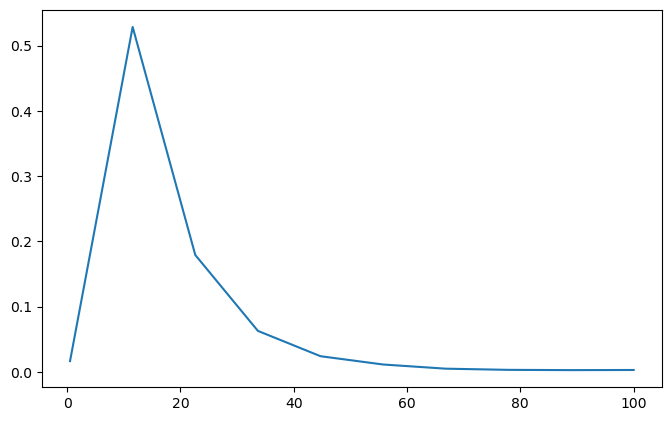

In [14]:
#Let's look at the catch!
print(numPart_W['target'][-11])

plt.figure()
plt.plot(thickScan_W,numPart_W['target'][-11]/baseSimSetup_W['N'])
plt.show()

In [15]:
#Histograms
print(objects_W.keys())
print(objects_W['target_exit_energy_PDG-11'])
print()

dict_keys(['target_exit_energy_PDG-11', 'targetEdep'])
[<ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_0_SimpleDemo-TargetThickness-W") at 0x5585339e7260>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_1_SimpleDemo-TargetThickness-W") at 0x55852f5af6e0>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_2_SimpleDemo-TargetThickness-W") at 0x55852f59c820>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_3_SimpleDemo-TargetThickness-W") at 0x5585340fae00>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_4_SimpleDemo-TargetThickness-W") at 0x5585340fb6d0>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_5_SimpleDemo-TargetThickness-W") at 0x5585340fa4a0>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_6_SimpleDemo-TargetThickness-W") at 0x558534104e10>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_7_SimpleDemo-TargetThickness-W") at 0x558534109890>, <ROOT.TH1D object ("target_exit_energy_PDG-11_THICK_8_SimpleDemo-TargetThickness-W") at 0x55853410a100>,

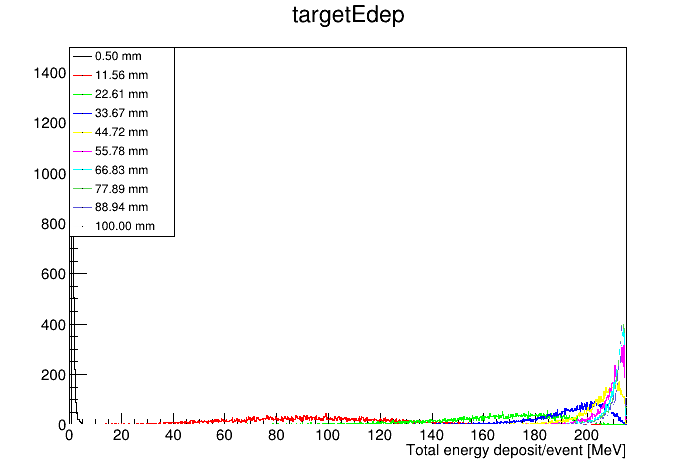

In [16]:
canvas = ROOT.TCanvas()
hasDrawn = False
edepLegend = None
for iThick in range(len(thickScan_W)):
    objects_W['targetEdep'][iThick].SetLineColor(iThick+1)
    objects_W['targetEdep'][iThick].GetYaxis().SetRangeUser(0,1500)  
    objects_W['targetEdep'][iThick].SetStats(False)
    if hasDrawn:
        option='same'
    else:
        option = ''
        edepLegend = ROOT.TLegend(0.1,0.9, 0.25, 0.5)
        
    objects_W['targetEdep'][iThick].Draw(option)
    hasDrawn = True
    
    edepLegend.AddEntry(objects_W['targetEdep'][iThick], "{:.2f} mm".format(thickScan_W[iThick]))
edepLegend.Draw()
canvas.Draw()

167.0
5287.0
1793.0
630.0
242.0
115.0
51.0
33.0
29.0
31.0


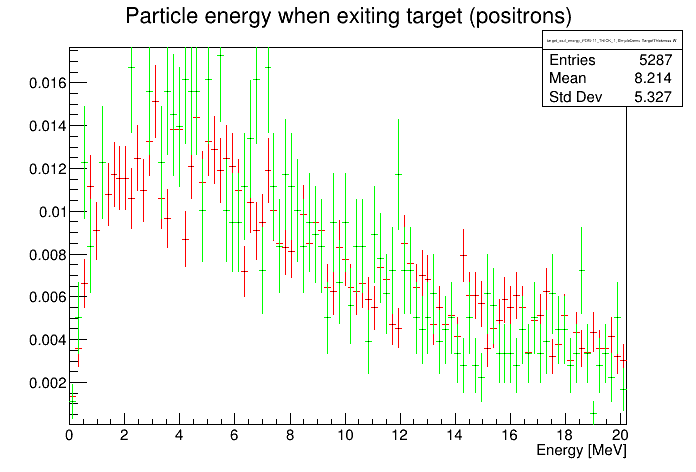

In [17]:
canvas = ROOT.TCanvas()
hasDrawn = False
for iThick in range(len(thickScan_W)):
    count = objects_W['target_exit_energy_PDG-11'][iThick].Integral()
    print(count)
    if count < 1000:
        continue
    objects_W['target_exit_energy_PDG-11'][iThick].SetLineColor(iThick+1)
    objects_W['target_exit_energy_PDG-11'][iThick].GetXaxis().SetRangeUser(0,20)
    objects_W['target_exit_energy_PDG-11'][iThick].Scale(1/count)
    
    if hasDrawn:
        option='same'
    else:
        option = ''
        
    objects_W['target_exit_energy_PDG-11'][iThick].Draw(option)
    hasDrawn = True
canvas.Draw()

if not hasDrawn:
    print("Insufficient statistics")